In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv('BankWages.csv')
data.head()

,rownames,job,education,gender,minority
0,1,manage,15,male,no
1,2,admin,16,male,no
2,3,admin,12,female,no
3,4,admin,8,female,no
4,5,admin,15,male,no


In [4]:
data.columns

Index(['rownames', 'job', 'education', 'gender', 'minority'], dtype='object')

In [7]:
data = data[['job', 'education', 'gender', 'minority']]
data.head()

,job,education,gender,minority
0,manage,15,male,no
1,admin,16,male,no
2,admin,12,female,no
3,admin,8,female,no
4,admin,15,male,no


In [20]:
from sklearn.preprocessing import LabelEncoder

lejob = LabelEncoder().fit(data['job'])
data['job'] = lejob.fit_transform(data['job'])

legen = LabelEncoder().fit(data['gender'])
data['gender'] = legen.fit_transform(data['gender'])

lemin = LabelEncoder().fit(data['minority'])
data['minority'] = legen.fit_transform(data['minority'])

data.head()

,job,education,gender,minority
0,2,15,1,0
1,0,16,1,0
2,0,12,0,0
3,0,8,0,0
4,0,15,1,0


array([[<Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'minority'}>]], dtype=object)

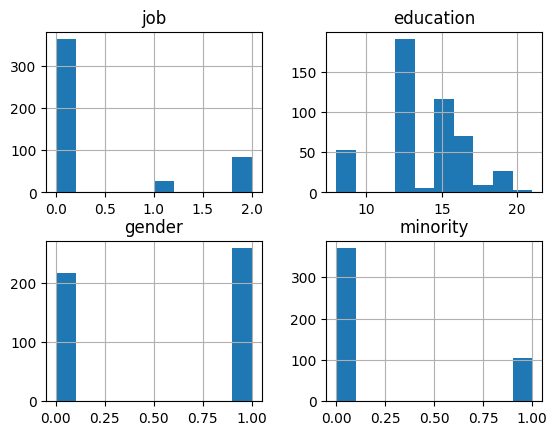

In [23]:
data.hist()

In [25]:
x = data[['job']].values
y = data[['minority']].values

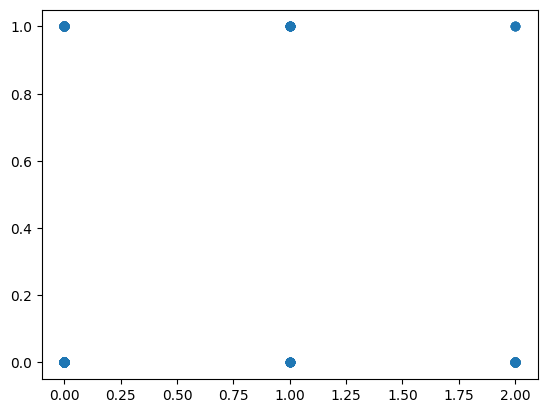

In [27]:
plt.scatter(x, y)

In [30]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=7)

In [91]:
k = 1
from sklearn.metrics import accuracy_score

scor = 0.0

for i in range(1,30):
    
    model = KNeighborsClassifier(n_neighbors=i).fit(train_x, train_y)
    if accuracy_score(model.predict(test_x), test_y) > scor:
        k = i
        scor = accuracy_score(model.predict(test_x), test_y)
        print('i : ', i)
        print('scor: ', scor)

k

i :  1
scor:  0.3157894736842105
i :  6
scor:  0.8421052631578947
i :  15
scor:  0.8631578947368421


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighb

15

In [92]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_x, train_y)
model.score(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7572559366754618

In [94]:
accuracy_score(model.predict(test_x), test_y)

0.8631578947368421

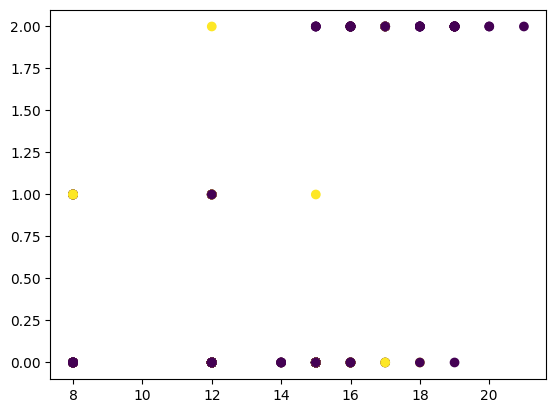

In [97]:
plt.scatter(data['education'], data['job'], c = y)